# Problem Set #4
- MACS 30250, Dr. Evans 
- Name: Kento Yoshizawa (CNET: kyoshizawa) 
- Date: June 5, 2020

In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
import time

## Exercise 2.1

In [2]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    b2, b3 = bvec_guess
    K = sum(bvec_guess)
    L = sum(nvec)
    
    r = alpha * A * (L/K)**(1-alpha) - delta
    w = (1-alpha) * A * (K/L)**alpha
    wvec = nvec*w
    c1 = wvec[0] - b2
    c2 = wvec[1] + (1 + r) * b2 - b3
    c3 = wvec[2] + (1 + r) * b3 
    
    K_cnstr = K <= 0
    c_cnstr = [c1 <= 0, c2 <= 0, c3 <= 0]
    b_cnstr = [c_cnstr[0] or c_cnstr[1], c_cnstr[2] or c_cnstr[1]]
    
    return b_cnstr, c_cnstr, K_cnstr

In [3]:
## Calibration
nvec  = np.array([1, 1, 0.2])
A     = 1.0
alpha = 0.35
delta = 0.6415
f_params = (nvec, A, alpha, delta)

In [4]:
## Check some initial guess
bvec_guess_all = [np.array([1.0, 1.2]), np.array([0.06, -0.001]), np.array([0.1, 0.1])]
itemize = ['(a)', '(b)', '(c)']
for bvec_guess, i in zip(bvec_guess_all, itemize):
    b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
    print(i)
    if any(b_cnstr + c_cnstr + K_cnstr):
        if any(c_cnstr):
            print(f" c_{np.where(c_cnstr)[0]+1} violate its constraint")
            print(f" b_{np.where(b_cnstr)[0]+2} violate its constraint" )
        if K_cnstr:
            print( " K violate its constraint")
    else:
        print( " No constraint is violated")

(a)
 c_[1] violate its constraint
 b_[2] violate its constraint
(b)
 No constraint is violated
(c)
 No constraint is violated


## Exercise 2.2

In [5]:
def get_SS(params, bvec_guess, SS_graphs=False):
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    
    util_p = lambda c : c ** (-sigma)
    
    def _get_EulErr_ss(bvec):
        b2, b3 = bvec
        K_ss = sum(bvec)
        
        r_ss = alpha * A * (L/K_ss)**(1-alpha) - delta
        w_ss = (1-alpha) * A * (K_ss/L)**alpha
        EulErr1 = util_p(w_ss - b2) \
                            - beta * (1 + r_ss) * util_p(w_ss + (1 + r_ss) * b2 - b3)
        EulErr2 = util_p(w_ss + (1 + r_ss) * b2 - b3) \
                            - beta * (1 + r_ss) * util_p(0.2*w_ss + (1 + r_ss) * b3)
        EulErr_ss = np.array([EulErr1, EulErr2])
        
        return EulErr_ss
    
    start = time.time()
    
    result    = root(_get_EulErr_ss, bvec_guess, tol=SS_tol)
    b_ss      = result.x 
    EulErr_ss = result.fun
    b2, b3 = b_ss
    
    K_ss = sum(b_ss)
    r_ss = alpha * A * (L/K_ss)**(1-alpha) - delta
    w_ss = (1-alpha) * A * (K_ss/L)**alpha
    wvec = nvec*w_ss
    c1   = wvec[0] - b2
    c2   = wvec[1] + (1 + r_ss) * b2 - b3
    c3   = wvec[2] + (1 + r_ss) * b3 
    c_ss = np.array([c1, c2, c3])
    C_ss = sum(c_ss)
    
    Y_ss = A * K_ss**alpha * L**(1-alpha)
    
    RCerr_ss = Y_ss - C_ss - delta*K_ss
    
    ss_time = time.time() - start
    
    ss_output = {'b_ss'     :b_ss,
                 'c_ss'     :c_ss,
                 'w_ss'     :w_ss,
                 'r_ss'     :r_ss,
                 'K_ss'     :K_ss,
                 'Y_ss'     :Y_ss,
                 'C_ss'     :C_ss,
                 'EulErr_ss':EulErr_ss,
                 'RCerr_ss' :RCerr_ss,
                 'ss_time'  :ss_time}
    
    
    if SS_graphs:
        plt.plot([1,2,3], c_ss, marker='o', label='Consumption')
        plt.plot([2,3],   b_ss, marker='o', label='Saving')
        plt.xlabel('Period')
        plt.ylabel('Amount')
        plt.title('Steady-state distribution')
        plt.legend()
        
       
    return ss_output
    

### (a)

In [6]:
beta       = 0.422
sigma      = 3.0
L          = 2.2
SS_tol     = 1e-9
bvec_guess = np.array([0.1, 0.1])
params     = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
SS = get_SS(params, bvec_guess)
SS

{'b_ss': array([0.01777461, 0.05498185]),
 'c_ss': array([0.17934075, 0.20555186, 0.2355938 ]),
 'w_ss': 0.19711535700230517,
 'r_ss': 2.567917964851558,
 'K_ss': 0.07275645833797925,
 'Y_ss': 0.667159669853956,
 'C_ss': 0.6204864018301423,
 'EulErr_ss': array([ 5.68434189e-14, -8.52651283e-14]),
 'RCerr_ss': 9.020562075079397e-17,
 'ss_time': 0.0004799365997314453}

### (b)

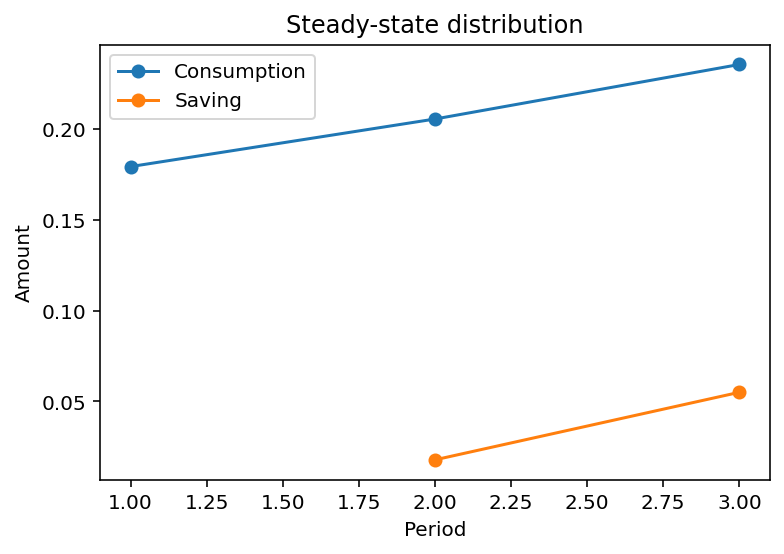

In [7]:
_ = get_SS(params, bvec_guess, True)

### (c)

In [8]:
beta    = 0.55
params  = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
get_SS(params, bvec_guess)

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446262,
 'r_ss': 1.8863765057190747,
 'K_ss': 0.10504237022597478,
 'Y_ss': 0.7586689708551043,
 'C_ss': 0.6912842903551415,
 'EulErr_ss': array([ 5.68434189e-14, -2.84217094e-14]),
 'RCerr_ss': 1.3877787807814457e-17,
 'ss_time': 0.0002849102020263672}

If househols become more patient, the consumption and saving over the period and $\bar{w}$ increase while $\bar{r}$ decrease. The intuiton behind this behavior is that households put more value on the future consumption and make savings more at present, which leads to increase wage due to higher demand and decrease interest rate due to higher capital (i.e., savings).

## Exercise 2.3

In [9]:
def get_EulErr_init(b3, *args):
    b2, w1, w2, r1, r2, beta, sigma = args
    util_p = lambda c : c ** (-sigma)
    
    EulErr = util_p(w1 + (1 + r1) * b2 - b3) \
                    - beta * (1 + r2) * util_p((1 + r2) * b3 + 0.2 * w2)
    return EulErr

def get_EulErr(bvec, *args):
    b2, b3 = bvec
    w1, w2, w3, r2, r3, beta, sigma = args
    util_p = lambda c : c ** (-sigma)
    
    EulErr1 = util_p(w1 - b2)\
                    - beta * (1 + r2) * util_p(w2 + (1 + r2) * b2 - b3)
    EulErr2 = util_p(w2 + (1 + r2) * b2 - b3)\
                    - beta * (1 + r3) * util_p((1 + r3) * b3 + 0.2 * w3)
    
    return np.array([EulErr1, EulErr2])    

In [10]:
T     = 50
tol   = 1e-9
beta  = 0.422
sigma = 3.0
L     = 2.2
xi    = 0.05

b_ss   = SS['b_ss']
b_init = b_ss * np.array([0.8, 1.1])
K_ss   = sum(b_ss)
K_init = sum(b_init)
K_path  = np.linspace(K_init, K_ss, T)

r_path  = alpha * A * (L/K_path)**(1-alpha) - delta
w_path  = (1-alpha) * A * (K_path/L)**alpha

In [11]:
%%time
bvec_path = np.zeros([T, 2])
err_vec   = np.zeros([T, 2])

dist = 10000
counter = 0
while dist > 1e-9:
    counter += 1
    ## Step 1.-----------------------------------------------------------
    bvec_path[0] = b_init
    result = root(get_EulErr_init, bvec_guess[1], 
                  args=(b_init[0], *w_path[:2], *r_path[:2], beta, sigma))
    bvec_path[1,1] = result.x
    err_vec[0,1]   = result.fun
    
    ## Step 2.-----------------------------------------------------------
    for t in range(1, T-1):
        result = root(get_EulErr, bvec_guess, 
                      args=(*w_path[t-1:t+2], *r_path[t:t+2], beta, sigma))
        bvec_path[t,0], bvec_path[t+1,1] = result.x
        err_vec[t,0],err_vec[t+1, 1]     = result.fun
        
    ## Step 3.-----------------------------------------------------------
    bvec_path[-1] = b_ss
    
    ## Calculate new K and distance -------------------------------------
    K_path_new = bvec_path.sum(axis=1)
    dist = sum((K_path_new - K_path) ** 2)
    
    ## Update path ------------------------------------------------------
    K_path = (1 - xi) * K_path + xi * K_path_new
    r_path  = alpha * A * (L/K_path)**(1-alpha) - delta
    w_path  = (1-alpha) * A * (K_path/L)**alpha

print(f"Total iterations: {counter}")

Total iterations: 176
CPU times: user 2.13 s, sys: 17 ms, total: 2.15 s
Wall time: 2.45 s


### (a)

In [12]:
Y  =  A * K_path**alpha * L**(1-alpha)
c1 =     w_path - bvec_path[:,0]
c2 =     w_path + (1 + r_path) * bvec_path[:,0] - bvec_path[:,1]
c3 = 0.2*w_path + (1 + r_path) * bvec_path[:,1]
C = c1 + c2 + c3

RCerr = Y - C - delta*K_path

print(f"- Maximum of the Euler error in the first eq.        : {max(abs(err_vec[:,0]))}")
print(f"- Maximum of the Euler error in the second eq.       : {max(abs(err_vec[:,1]))}")
print(f"- Maximum of the aggregate resource constraint errors: {max(abs(RCerr))}")

- Maximum of the Euler error in the first eq.        : 6.477023362094769e-10
- Maximum of the Euler error in the second eq.       : 2.1951862549940415e-08
- Maximum of the aggregate resource constraint errors: 1.762083874179421e-05


### (b)

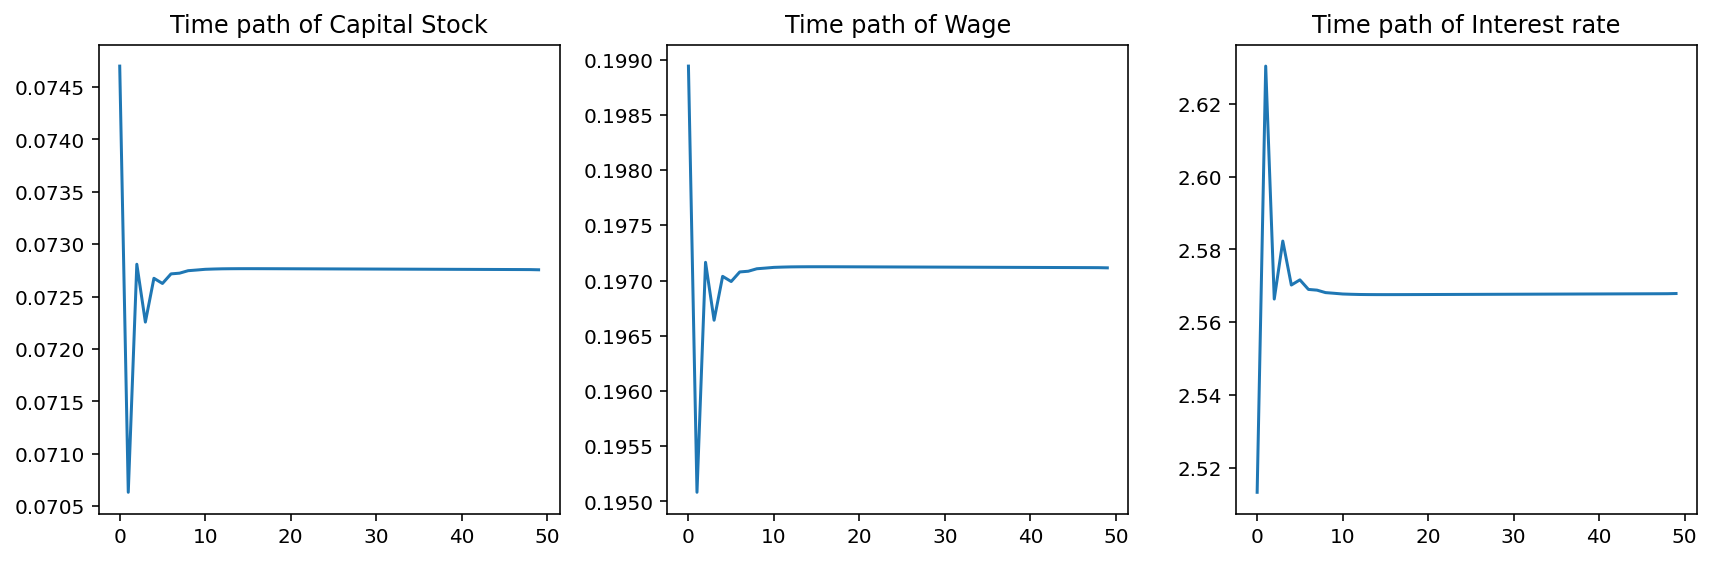

In [13]:
path   = [K_path, w_path, r_path]
labels = ['Capital Stock', 'Wage', 'Interest rate']

fig, ax = plt.subplots(figsize=(12, 4), ncols=3, tight_layout=True)
for i, p in enumerate(path):
    ax[i].plot(p)
    ax[i].set_title(f"Time path of {labels[i]}")

In [14]:
first_touch = min(np.where(abs(K_ss - K_path) < 1e-5)[0]) + 1
converge_ss = max(np.where(abs(K_ss - K_path) > 1e-5)[0]) + 2
print(f'First time to close to the steady-state: Period {first_touch}')
print(f'Converged to close to the steady-state : Period {converge_ss}')

First time to close to the steady-state: Period 9
Converged to close to the steady-state : Period 20
